In [114]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from cycler import cycler

In [4]:
%matplotlib inline

In [12]:
dataset_path = 'Dataset/dataset_v06_sines_full.npz'
ds = np.load(dataset_path)

In [89]:
measured_angles = ds['measured_angles']
measured_vels = ds['measured_velocities']
measured_torques = ds['measured_torques']
desired_torques = ds['desired_torques']

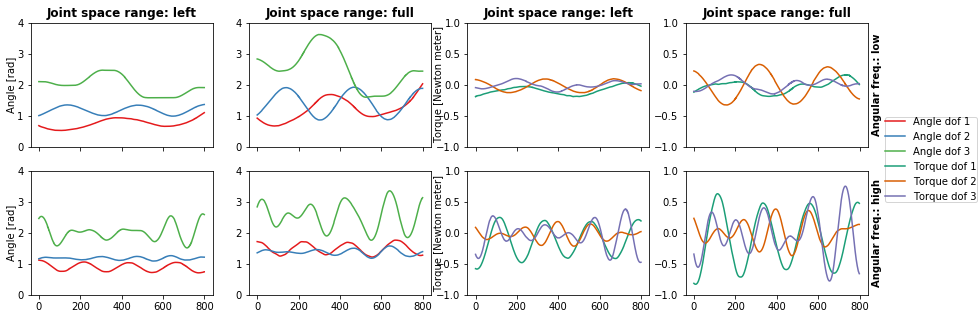

In [142]:
start, end = 2000, 2800
seq_id = 35
idx = 0
fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, figsize=(15,5))
frequencies = ['low', 'high']
space_range = ['left', 'full', 'left', 'full']
lines = []
for i in range(4):
    if i % 2 == 0:
        idx = 0
    for j in range(2):
        if i < 2:
            rollout = measured_angles[idx + seq_id, start:end, :]
            axs[j, i].set_prop_cycle(cycler(color=plt.get_cmap('Set1').colors))
        else:
            rollout = desired_torques[idx + seq_id, start:end, :]
            axs[j, i].set_prop_cycle(cycler(color=plt.get_cmap('Dark2').colors))
        angle_trajs = axs[j, i].plot(rollout)
        if i == 0:
            axs[j, i].set_ylabel('Angle [rad]', labelpad=0)
        if i == 2:
            axs[j, i].set_ylabel('Torque [Newton meter]', labelpad=-8)
        if i == 3:
            axs[j, i].set_ylabel('Angular freq.: {}'.format(frequencies[j]),
                                 weight='bold')
            axs[j, i].yaxis.set_label_position("right")
        if j == 0:
            axs[j, i].set_title('Joint space range: {}'.format(space_range[i]),
                                 weight='bold')
        if i < 2:
            axs[j, i].set_ylim((0, 4))
        else:
            axs[j, i].set_ylim((-1, 1))
        idx += 50
    if i in (0, 2):
        lines.extend(angle_trajs)
labels = ['Angle dof {}'.format(d + 1) for d in range(3)]
torque_labels = ['Torque dof {}'.format(d + 1) for d in range(3)]
labels.extend(torque_labels)
fig.legend(lines, labels, loc='right', borderpad=0, borderaxespad=0.3)

In [18]:
ds['measured_angles'].shape

(200, 15000, 3)